### Import Packages

In [1]:
import os
import sys
import gzip
import random

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import keras

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras.utils.np_utils import to_categorical

from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [4]:
from keras.models import Sequential, model_from_json

#from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

from keras.optimizers import Adam, RMSprop

In [5]:
from keras.layers.core import Lambda, Dense, Flatten, Dropout

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from subprocess import check_output

### Extracting the data

In [9]:
f = gzip.open('datasets/mnist/mnist.pkl.gz')
data = pickle.load(f, encoding='bytes')
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/mnist/mnist.pkl.gz'

In [160]:
(x_train, y_train), (x_test, y_test) = data

In [161]:
x_train.shape

(60000, 28, 28)

### Data Visualization

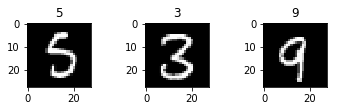

In [162]:
for i in range(6, 9):
    
    rand_i = random.randint(0, x_train.shape[0])
    
    plt.subplot(331+i)
    plt.imshow(x_train[rand_i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[rand_i])    

### Preprocessing

In [163]:
# shape of data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] ,x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] ,x_test.shape[2], 1))

print('train shape:',x_train.shape)
print('test shape:',x_test.shape)

train shape: (60000, 28, 28, 1)
test shape: (10000, 28, 28, 1)


In [164]:
## standardizing the digit images

mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(data):
    return (data - mean_px)/(std_px)

In [165]:
# one hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [166]:
print(y_train_cat.shape)
print(y_test_cat.shape)


(60000, 10)
(10000, 10)


# Creating Neural Network Architecture

In [168]:
# fixing random seem
seed = 7
np.random.seed(seed)

## Simple linear Model

In [184]:
# simple model
def simple_model():
    
    model = Sequential()
    model.add(Lambda(standardize, input_shape=(28,28,1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    
    model.compile(optimizer=RMSprop(lr=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [170]:
model = simple_model()

input shape (None, 28, 28, 1)
output shape (None, 10)


In [171]:
# IMAGE GENERATOR
gen = image.ImageDataGenerator()

In [174]:
batches = gen.flow(x_train, y_train_cat, batch_size=64)
val_batches = gen.flow(x_test, y_test_cat, batch_size=64)

In [175]:
# training and saving
history = model.fit_generator(generator=batches,
                              steps_per_epoch=batches.n,
                              epochs=3,
                              validation_data=val_batches,
                              validation_steps=val_batches.n)

Epoch 1/3
60000/60000 [==============================] - 163s 3ms/step - loss: 0.2578 - acc: 0.9302 - val_loss: 0.3112 - val_acc: 0.9196
Epoch 2/3
60000/60000 [==============================] - 168s 3ms/step - loss: 0.2436 - acc: 0.9346 - val_loss: 0.3142 - val_acc: 0.9219
Epoch 3/3
60000/60000 [==============================] - 166s 3ms/step - loss: 0.2411 - acc: 0.9353 - val_loss: 0.3259 - val_acc: 0.9210


In [176]:
# plotting results
history_dict = history.history
history_dict

{'val_loss': [0.311233871904258, 0.31424809163712103, 0.32594997613894294],
 'val_acc': [0.9195982266207832, 0.9218541985883298, 0.9210190022858004],
 'loss': [0.25776657194070424, 0.24362834394111682, 0.24112454102844685],
 'acc': [0.9301656807323845, 0.9345893087922624, 0.9353175860458911]}

### plotting results (simple linear model)

In [209]:
n_epochs = range(1, len(loss_values) + 1)

range(1, 4)

In [234]:
def plot_history(history_dict=history.history):
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.set_xlabel('Epochs')

    # loss plot
    ax1.plot(n_epochs, history_dict['loss'], color=(0.8,0,0))
    ax1.plot(n_epochs, history_dict['val_loss'], color=(0.5, 0, 0))

    # loss scale
    ax1.set_ylabel('Loss', color='r')
    ax1.tick_params('y', colors='r')

    ax2 = ax1.twinx()

    # acc plot
    ax2.plot(n_epochs, history_dict['acc'], color=(0,0.8,0))
    ax2.plot(n_epochs, history_dict['val_acc'], color=(0,0.5,0))

    # acc scale
    ax2.set_ylabel('Accuracy', color='g')
    ax2.tick_params('y', colors='g')

    fig.legend(['loss', 'val_loss', 'acc', 'val_acc'], loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()
    plt.show()

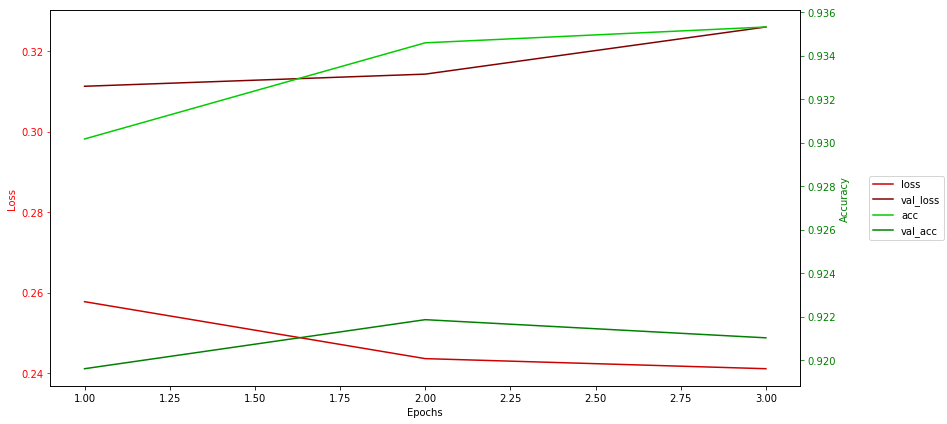

In [236]:
plot_history()

## CNN

In [238]:
# cnn model architecture
def cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28, 28, 1)),
        Convolution2D(32, (3,3), activation='relu'),
        Convolution2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64, (3,3), activation='relu'),
        Convolution2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(Adam(), loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [239]:
model=cnn_model()

In [ ]:
history = mode